# Bab 8: Dimensi Reduction (Reduksi Dimensi)

### 1. Pendahuluan

Bab 8 membahas konsep *Dimensionality Reduction* (Reduksi Dimensi), sebuah teknik penting dalam *Machine Learning* yang bertujuan untuk mengurangi jumlah fitur (dimensi) dalam sebuah dataset. Meskipun memiliki banyak fitur dapat membantu beberapa algoritma, terkadang terlalu banyak fitur dapat menyebabkan masalah.

**"Curse of Dimensionality" (Kutukan Dimensi):**
Dalam ruang berdimensi tinggi, data menjadi sangat jarang (*sparse*). *Instance training* cenderung sangat jauh satu sama lain, membuat prediksi yang andal menjadi sangat sulit, dan model cenderung *overfit*. Hal ini juga dapat menyebabkan masalah komputasi dan memori.

**Manfaat Reduksi Dimensi:**
* Mempercepat algoritma pelatihan (karena data lebih kecil).
* Mengurangi kebutuhan memori.
* Membantu memvisualisasikan data berdimensi tinggi.
* Mengurangi *noise* dan *redundancy*, berpotensi meningkatkan kinerja beberapa model (misalnya, beberapa algoritma peka terhadap dimensi tinggi).

**Kerugian Reduksi Dimensi:**
* Kehilangan informasi (model mungkin kehilangan sebagian informasi yang berguna).
* Komputasi yang kompleks (beberapa algoritma reduksi dimensi bisa lambat).
* Mengurangi interpretasi model (lebih sulit memahami apa yang diwakili oleh fitur-fitur baru).

Bab ini akan mengeksplorasi dua pendekatan utama: **Proyeksi (Projection)** dan **Manifold Learning (Pembelajaran Manifold)**, serta beberapa algoritma reduksi dimensi populer seperti PCA, Kernel PCA, LLE, dan t-SNE.

### 2. Proyeksi (Projection)

Pada banyak masalah, *instance training* tidak tersebar secara merata di semua dimensi. Sebaliknya, mereka mungkin terletak pada *subspace* berdimensi rendah dari ruang berdimensi tinggi. Proyeksi adalah teknik untuk memproyeksikan data dari ruang dimensi tinggi ke *subspace* berdimensi rendah.

Contoh sederhana diberikan di mana titik-titik 3D yang hampir terletak pada sebuah bidang dapat diproyeksikan ke bidang 2D tersebut. Namun, proyeksi tidak selalu merupakan solusi terbaik. Dalam kasus dataset *Swiss roll*, proyeksi sederhana ke 2D akan menekan gulungan, mengakibatkan titik-titik yang seharusnya jauh menjadi dekat.

### 3. Manifold Learning (Pembelajaran Manifold)

*Manifold* adalah ruang berdimensi rendah yang "tertekuk" atau "terpelintir" di dalam ruang berdimensi tinggi. Contohnya adalah permukaan daun kertas yang digulung (`Swiss roll`). *Manifold Learning* adalah bidang yang berusaha menemukan *manifold* ini dan "membuka"nya untuk mengurangi dimensi. Ini seringkali lebih efektif daripada proyeksi lurus untuk data non-linier yang memiliki struktur *manifold*.

Algoritma *manifold learning* biasanya mengasumsikan bahwa dimensi yang dikurangi harus mendekati atau mempertahankan jarak lokal antar *instance*.

### 4. Principal Component Analysis (PCA)

PCA adalah algoritma reduksi dimensi paling populer. Ini mengidentifikasi *hyperplane* (bidang) yang paling dekat dengan data, kemudian memproyeksikan data ke *hyperplane* tersebut.

#### a. Mempertahankan Varian (Preserving the Variance)
PCA memilih sumbu yang memaksimalkan varians data proyeksi. Ini masuk akal karena semakin besar varians pada *subspace*, semakin sedikit informasi yang hilang.

#### b. Komponen Utama (Principal Components)
Sumbu-sumbu yang memaksimalkan varians ini disebut **komponen utama (principal components - PCs)**. PCs pertama adalah arah yang menjelaskan varians terbesar, PCs kedua menjelaskan varians terbesar yang ortogonal terhadap yang pertama, dan seterusnya.
PCs dapat ditemukan menggunakan teknik dekomposisi nilai singular (SVD) pada matriks data.
$$ \mathbf{X} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^\intercal $$
Vektor-vektor kolom dari $\mathbf{V}$ adalah komponen utama.

#### c. Proyeksi ke d Dimensi (Projecting Down to d Dimensions)
Setelah mengidentifikasi $d$ komponen utama pertama, kita dapat memproyeksikan dataset ke *hyperplane* yang ditentukan oleh $d$ komponen tersebut. Ini dilakukan dengan menghitung *dot product* dari matriks data $\mathbf{X}$ dengan matriks $\mathbf{W}_d$, yang berisi $d$ komponen utama pertama sebagai kolom.

#### d. PCA Menggunakan Scikit-Learn (PCA Using Scikit-Learn)
`PCA` di Scikit-Learn sangat mudah digunakan. Ini secara otomatis menangani sentrasi data.
Contoh penggunaan `PCA` untuk mengurangi dimensi dataset MNIST ditunjukkan.

#### e. Rasio Varians yang Dijelaskan (Explained Variance Ratio)
*Hyperparameter* penting adalah `n_components`, yaitu jumlah dimensi target. Alih-alih menentukan jumlah dimensi secara arbitrer, seringkali lebih baik memilih jumlah dimensi yang mempertahankan sebagian besar varians yang dijelaskan (misalnya, 95%). Atribut `explained_variance_ratio_` dari objek `PCA` menunjukkan proporsi varians yang dijelaskan oleh setiap komponen utama.

#### f. Memilih Jumlah Dimensi yang Tepat (Choosing the Right Number of Dimensions)
Plot kumulatif dari rasio varians yang dijelaskan dapat digunakan untuk memvisualisasikan berapa banyak varians yang dipertahankan oleh sejumlah komponen. Seringkali, kita mencari "tikungan siku" (*elbow*) pada plot ini, di mana penambahan komponen selanjutnya tidak lagi memberikan peningkatan varians yang signifikan.

#### g. PCA untuk Kompresi (PCA for Compression)
Setelah reduksi dimensi, dataset yang diproyeksikan membutuhkan lebih sedikit ruang penyimpanan. Jika Anda perlu mendekompensasi data asli (yaitu, memproyeksikan kembali ke ruang dimensi tinggi), Anda dapat menggunakan metode `inverse_transform()`. Meskipun data yang didekompresi tidak akan persis sama dengan data asli karena hilangnya informasi, kualitasnya mungkin cukup baik untuk banyak aplikasi. Perbedaan antara data asli dan dekompresi disebut *reconstruction error*.

#### h. PCA Inkremental (Incremental PCA)
Untuk dataset yang terlalu besar untuk disimpan dalam memori (dataset *out-of-core*), `IncrementalPCA` dari Scikit-Learn dapat digunakan. Ini memecah *training set* menjadi *mini-batches* dan memberi makan satu per satu ke algoritma IPCA.

#### i. PCA Acak (Randomized PCA)
`RandomizedPCA` (sekarang bagian dari `PCA` dengan `svd_solver='randomized'`) adalah algoritma probabilistik yang secara efisien menemukan $d$ komponen utama pertama. Ini secara signifikan lebih cepat daripada PCA penuh ketika $d$ jauh lebih kecil daripada $n$ (jumlah fitur).

### 5. Kernel PCA

Seperti yang dibahas di Bab 5, *kernel trick* adalah teknik matematika yang memungkinkan algoritma kompleks untuk bekerja pada pola non-linier. *Kernel PCA* (kPCA) adalah versi PCA yang menerapkan *kernel trick* untuk melakukan transformasi non-linier sebelum proyeksi. Ini memungkinkan reduksi dimensi non-linier.

Scikit-Learn menyediakan `KernelPCA` dengan berbagai kernel (misalnya, `rbf`, `poly`, `sigmoid`).
*Hyperparameter* penting termasuk `n_components`, `kernel`, dan parameter spesifik kernel (misalnya, `gamma` untuk RBF, `degree` dan `coef0` untuk polinomial).

#### a. Memilih Kernel dan Menyetel Hyperparameter (Selecting a Kernel and Tuning Hyperparameters)
Memilih kernel yang tepat dan menyetel *hyperparameter*nya bisa rumit karena itu adalah masalah *unsupervised learning* (tidak ada label target). Satu pendekatan adalah menggunakan `GridSearchCV` dengan pengklasifikasi atau regressor linier setelah Kernel PCA, lalu memilih *hyperparameter* kPCA yang menghasilkan kinerja terbaik pada tugas *supervised* hilir.

### 6. LLE (Locally Linear Embedding)

LLE adalah algoritma *Manifold Learning* non-linier yang kuat yang tidak bergantung pada proyeksi. Ia bekerja dengan mengidentifikasi bagaimana setiap *instance training* secara linier terkait dengan tetangga terdekatnya. Kemudian, ia mencoba menemukan representasi berdimensi rendah dari *training set* di mana hubungan linier lokal ini dipertahankan. Ini sangat baik untuk "membuka" *manifold* seperti *Swiss roll*.

Kelebihan utama LLE adalah tidak bergantung pada transformasi kompleks yang mahal dan tidak perlu *kernel trick*.
Kekurangan utama LLE adalah skalanya buruk dengan jumlah *instance* (sekitar $O(m^3)$) dan bisa sensitif terhadap jumlah tetangga terdekat (`n_neighbors`).

### 7. Other Dimensionality Reduction Techniques (Teknik Reduksi Dimensi Lainnya)

Bab ini juga menyebutkan secara singkat beberapa algoritma reduksi dimensi lainnya:

* **Multidimensional Scaling (MDS):** Mencoba mempertahankan jarak antar *instance*.
* **Isomap:** Mencoba mempertahankan jarak geodetik (jarak terpendek di sepanjang *manifold*) antar *instance*.
* **t-Distributed Stochastic Neighbor Embedding (t-SNE):** Terutama digunakan untuk visualisasi dimensi tinggi. Ia mencoba menjaga *instance* serupa tetap berdekatan dan *instance* tidak serupa tetap berjauhan. Ini sangat baik untuk memvisualisasikan *cluster* data dalam 2D atau 3D.
* **Linear Discriminant Analysis (LDA):** Teknik klasifikasi yang juga dapat digunakan untuk reduksi dimensi. Ini adalah algoritma yang diawasi (supervised), artinya ia menggunakan informasi kelas selama proses reduksi dimensi untuk memproyeksikan data ke *subspace* yang memaksimalkan pemisahan antar kelas.

### 8. Kesimpulan

Bab 8 memberikan pemahaman yang komprehensif tentang pentingnya dan tantangan dari reduksi dimensi. Konsep "kutukan dimensi" dan manfaat reduksi dimensi dijelaskan. Berbagai algoritma populer dibahas, mulai dari PCA sebagai teknik proyeksi linier yang fundamental, hingga Kernel PCA dan LLE sebagai metode *manifold learning* non-linier, serta t-SNE untuk visualisasi. Pemilihan algoritma yang tepat tergantung pada karakteristik data dan tujuan reduksi dimensi.


## 1. PCA

### Generating some 3D data

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting

np.random.seed(42)

m = 60
w1, w2 = 0.1, 0.3
a, b = 0.5, 0.2
X = 3 * np.random.rand(m, 2)
X_3D = np.c_[X[:, 0] * w1 + X[:, 1] * w2 + b, X[:, 0] + a, X[:, 1] + a]

### Centering the Data

In [14]:
X_centered = X_3D - X_3D.mean(axis=0)

### Computing the covariance matrix

In [15]:
cov_matrix = X_centered.T.dot(X_centered) / (m - 1)

### Computing the eigenvectors and eigenvalues (Principal Components)

In [16]:
from numpy.linalg import eig

eigenvalues, eigenvectors = eig(cov_matrix)
eigenvectors # V in SVD, contains the principal components as columns
eigenvalues

array([-1.11022302e-16,  8.16973511e-01,  8.60994656e-01])

### Projecting the data onto the first 2 principal components

In [17]:
# Projecting X_centered onto the first two principal components
# W_d will be the matrix containing the first d principal components
W_d = eigenvectors[:, :2] # taking the first two principal components
X_reduced = X_centered.dot(W_d)

### PCA using Scikit-Learn

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced_sklearn = pca.fit_transform(X_3D)

# The components attribute contains the principal components
pca.components_ # This is V.T, so rows are PCs

# The explained_variance_ratio_ attribute indicates the proportion of the dataset's variance
# that lies along each principal component.
pca.explained_variance_ratio_

array([0.5131174, 0.4868826])

### Choosing the Right Number of Dimensions

In [19]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_mnist = mnist["data"]
y_mnist = mnist["target"].astype(np.uint8)

pca = PCA()
pca.fit(X_mnist)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 # Find d for 95% variance

In [20]:
d

np.int64(154)

In [21]:
# PCA with n_components selected
pca = PCA(n_components=0.95) # Keep 95% of variance
X_reduced_mnist = pca.fit_transform(X_mnist)

### PCA for Compression

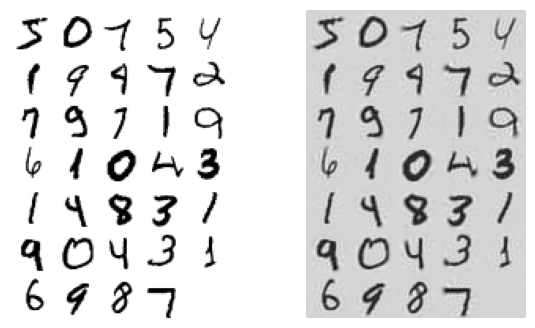

In [22]:
# Reconstruct the original data
X_recovered = pca.inverse_transform(X_reduced_mnist)

# This part would involve plotting the original and recovered digits
# to visually inspect the quality of reconstruction, similar to Figure 8-3 in the book.
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty), int))
    for row in range(n_rows):
        r_images = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(r_images, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = "binary", **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_mnist[::2100]) # Original
plt.subplot(122)
plot_digits(X_recovered[::2100]) # Recovered
plt.show()

### Incremental PCA

In [23]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154) # 154 components for 95% variance from earlier
for X_batch in np.array_split(X_mnist, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced_inc_pca = inc_pca.transform(X_mnist)

### Randomized PCA

In [24]:
# Randomized PCA is now integrated into the main PCA class.
# Just set svd_solver='randomized'
pca_randomized = PCA(n_components=154, svd_solver='randomized', random_state=42)
X_reduced_randomized = pca_randomized.fit_transform(X_mnist)

## 2. Kernel PCA

In [25]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Kernel PCA with RBF kernel
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04, fit_inverse_transform=True, random_state=42)
X_reduced_rbf = rbf_pca.fit_transform(X)

# Kernel PCA with polynomial kernel
poly_pca = KernelPCA(n_components=2, kernel="poly", degree=3, coef0=1, random_state=42)
X_reduced_poly = poly_pca.fit_transform(X)

# Kernel PCA with sigmoid kernel
sigmoid_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, random_state=42)
X_reduced_sigmoid = sigmoid_pca.fit_transform(X)

### Selecting a Kernel and Tuning Hyperparameters

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression(solver="lbfgs"))
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X, y) # X and y from make_moons

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf']}])

In [27]:
grid_search.best_params_

{'kpca__gamma': np.float64(0.03222222222222222), 'kpca__kernel': 'rbf'}

## 3. LLE (Locally Linear Embedding)

In [28]:
from sklearn.manifold import LocallyLinearEmbedding

# Generate Swiss Roll dataset
from sklearn.datasets import make_swiss_roll
X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# Apply LLE
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced_lle = lle.fit_transform(X_swiss)

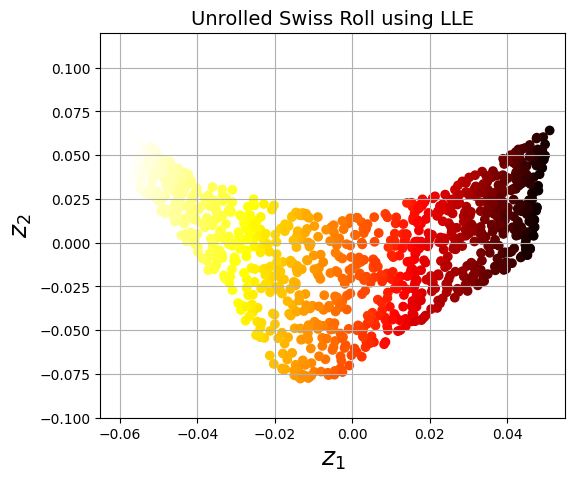

In [30]:
# This part would involve plotting the Swiss Roll and its LLE projection,
# similar to Figure 8-11 in the book.
plt.figure(figsize=(6, 5))
plt.title("Unrolled Swiss Roll using LLE", fontsize=14)
plt.scatter(X_reduced_lle[:, 0], X_reduced_lle[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel(r"$z_1$", fontsize=18)
plt.ylabel(r"$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.show()